# <center> Bagging: RandomForest </center> 
# <center> & </center> 
# <center>Boosting: XGBoost (eXtreme Gradient Boosting)</center>

### Bagging (short for Bootstrap Aggregating)
is an **ensemble learning technique** designed to improve the **accuracy and stability** of machine learning models by reducing **variance (overfitting)**. It works by training **multiple models** on different random **subsets** of the training data and then **aggregating** their predictions.

#### How Bagging Works:

1. **Bootstrapping the Data**
   - Create **multiple datasets** by randomly sampling (with replacement) from the original training data
   - Each subset may contain duplicates and be the same size as the original
     
2. **Train Base Learners**
   - Train a **separate model** (for example decision tree) on each bootstrap sample
     
3. **Aggregate Predictions**
   - For classification: Use majority voting
   - For regression: Use average prediction

> **Bagging = Bootstrap Sampling + Aggregation**
> 
> Helps make unstable models (like decision trees) more robust and less prone to overfitting.


### Boosting
is an **ensemble machine learning technique** that builds a **strong model** by **combining multiple weak models** (usually decision trees), **trained sequentially**, each one focusing on the errors made by the previous ones. It aims to **reduce both bias and variance**, making it powerfull for both classification and regression problems.

#### How Boosting Works:

1. **Initialize the model** with a weak learner (for example small decision tree)
2. **Evaluate errors**: Identify where the model performs poorly
3. **Train a new model** that focuses more on the previously misclassified or high-error instances
4. **Combine models** by giving more weight to accurate ones and correcting the mistakes iteratively
5. **Repeat** the process for a specified number of rounds or until performance stops improving

> **Boosting = Sequential Correstion of Mistakes + Weighted Ensemble**
> 
> Boosting is like a team where each member corrects the mistakes of the one before - leading to a highly accurate final result.

### Note: 

### What is the difference between h2o and scikit-learn libraries?

The difference between h2o and Scikit-learn lies in their design philosopy, scalability, and capabilities. Here is a structured comparison:

1. **Core Purpose**

|**Feature**|**h2o**|**Scikit-learn**|
|--|--|--|
|Goal|Scalable, enterprise-grade ML on big data|General-purpose ML for small and medium datasets|
|Audience|Data Scientists, ML engineers, enterprise teams| Researches, developers, students|

2. **Scalability**

|**Feature**|**h2o**|**Scikit-learn**|
|--|--|--|
|Distributed support|Yes (multi-core, multi-node, in-memory)| No (single-core or multi-core, but not distributed)|
|Big data handling|Handles massive datasets via h2o frame|Limited by RAM; not suitable for very large dataset

3. **Machine Learning Models**

|**Feature**|**h2o**|**Scikit-learn**|
|--|--|--|
|Algorithms|GBM, GLM, Deep Learning, XGBoost, DRF, AutoML|Wide variety: SVM, RF, KNN, PCA, Regression, etc|
|AutoML|Yes (built-in with leaderboard & ensembles)|No built-in AutoML (can use third-party tools like TPOT)|
|Deep Learning|Yes (feefforward only, via h2o Deep Learning)|No (use TensorFlow, PyTorch seperately)

4. **Data Handling**

|**Feature**|**h2o**|**Scikit-learn**|
|--|--|--|
|Data Structure|h2oFrame (distributed, like pandas DataFrame)|pandas/numpy arrays|
|Data Transfer|Requires conversionbetween pandas <-> h2oFrame| Native pandas support|

5. **Ease of Use & Integration**

|**Feature**|**h2o**|**Scikit-learn**|
|--|--|--|
|API Style|Functional or object-oriented, but custom conventions|Clean, consistent, and Pythonic|
|Model persistence|Supports model saving/loading|Native via joblib or pickle|
|Ecosystem|Java backend, Python/R/Scala APIs|Fully Python-based|

6. **Summary**

|**Use h2o when...**|**Use Scikit-learn when...**|
|--|--|
|working with large-scale data|working with small to medium datasets|
|need AutoML and ensemble pipelines|want full control over ML pipeline steps|
|prefer distributed in-memory training|doing quick prototyping or academic projects|
|intergrating with Java/Spark|in a pure Python environment|

### What is the definition for Big, Medium and Small datasets?

|**Size Category**|**Entries**|**Features**|**Typical Context**|
|--|--|--|--|
|Small Data|Up to 10,000 rows|Up to 50 columns|Local processing, prototyping, academic use|
|Medium Data|10,000 – 1,000,000 rows|50 – 500 features|Typical business/ML projects|
|Bid Data|Over 1 million rows|500+ features or sparse/complex|Requires distributed systems (e.g., H2O, Spark, Dask)|

The training data has only 60 rows and 10 features - small dataset, hence scikit-learn library will be used in Python environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import metrics

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data.csv', sep = ',')
data.head()

,Sector,CEO_Gender,Size,Security_Invest,Security_Breach_Att,Succ_Sec_Breaches,Sec_Rating,CEO_Sec_Exp,LOT_in_Business,Stock_Market
0,Banking,Female,Small,17,11,2,Medium,High,13,No
1,Banking,Male,Small,18,12,4,High,Low,9,No
2,Banking,Male,Small,17,12,4,High,Medium,22,No
3,Banking,Male,Small,24,13,1,High,Medium,3,Yes
4,Banking,Male,Small,32,14,3,High,Medium,4,Yes


### RandomForestRegressor

In [3]:
X = data.drop(['Succ_Sec_Breaches'], axis = 1)
y = data['Succ_Sec_Breaches']

In [4]:
# Column categories

nominal_variable = ['Sector', 'Stock_Market', 'CEO_Gender']
ordinal_variable = ['Size', 'Sec_Rating', 'CEO_Sec_Exp']
numeric_variable = ['Security_Breach_Att', 'Security_Invest', 'LOT_in_Business']

# Preprocessor

preprocessor = ColumnTransformer([
    ('nominal', preprocessing.OneHotEncoder(handle_unknown = 'ignore'), nominal_variable),
    ('ordinal', preprocessing.OrdinalEncoder(), ordinal_variable),
    ('scale', preprocessing.StandardScaler(), numeric_variable)
])

In [5]:
def print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
    print('Train RMSE: {:.3f}'. format(metrics.root_mean_squared_error(y_train, y_train_pred)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
    print('Test RMSE: {:.3f}'.format(metrics.root_mean_squared_error(y_test, y_test_pred)))

In [6]:
# Initial Model run

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ensemble.RandomForestRegressor(n_estimators = 500, random_state = 42))
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.989
Train MAE: 1.722
Train RMSE: 2.568


Test R^2: 0.855
Test MAE: 4.501
Test RMSE: 7.002


### Conclusion:

The model generalizes well, but there is noticeable performance drop from train to test, suggesting mild overfitting.

Therefore, it is worth to try the following:
- transform features using PowerTransformer - method: yeo-johnson
- hyperparameter tuning using RandomizedSearchCV
- cross-validation

In [7]:
# Improved model 

preprocessor = ColumnTransformer([
    ('nominal', preprocessing.OneHotEncoder(handle_unknown = 'ignore'), nominal_variable),
    ('ordinal', preprocessing.OrdinalEncoder(), ordinal_variable),
    ('scale', preprocessing.PowerTransformer(method = 'yeo-johnson'), numeric_variable)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ensemble.RandomForestRegressor(random_state = 42))
])

# RandomizedSearchCV 

param_distributions = {
    'regressor__n_estimators' : [100, 200, 300, 500],
    'regressor__max_depth' : [None, 5, 10, 15],
    'regressor__min_samples_split' : [2, 4, 6],
    'regressor__min_samples_leaf' : [1, 2, 4],
    'regressor__max_features' : ['sqrt', 'log2', None]
}

random_search = model_selection.RandomizedSearchCV(pipeline,
                                                  param_distributions = param_distributions, n_iter = 25,
                                                  scoring = 'neg_root_mean_squared_error',
                                                  cv = 5, n_jobs = -1,
                                                  verbose = 1, random_state = 42)

random_search.fit(X, y)

best_model = random_search.best_estimator_

# Define scorers for cross-validation

mae_scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = False)
rmse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False, squared = False)

# Cross-validation scores

r2_cv = model_selection.cross_val_score(best_model, X, y, cv = 5, scoring = 'r2')
mae_cv = model_selection.cross_val_score(best_model, X, y, cv = 5, scoring = mae_scorer)
rmse_cv = model_selection.cross_val_score(best_model, X, y, cv = 5, scoring = rmse_scorer)

print('Best Parameters: ', random_search.best_params_)
print('\nCross-Validation (5-fold) Results:')
print(f'R^2:  Mean = {r2_cv.mean():.3f}, Std = {r2_cv.std():.3f}')
print(f'MAE:  Mean = {mae_cv.mean():.3f}, Std = {mae_cv.std():.3f}')
print(f'RMSE: Mean = {rmse_cv.mean():.3f}, Std = {rmse_cv.std():.3f}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters:  {'regressor__n_estimators': 500, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': None, 'regressor__max_depth': 5}

Cross-Validation (5-fold) Results:
R^2:  Mean = 0.802, Std = 0.119
MAE:  Mean = -5.298, Std = 3.357
RMSE: Mean = nan, Std = nan


In [8]:
# Final Model

preprocessor = ColumnTransformer([
    ('nominal', preprocessing.OneHotEncoder(handle_unknown = 'ignore'), nominal_variable),
    ('ordinal', preprocessing.OrdinalEncoder(), ordinal_variable),
    ('scale', preprocessing.PowerTransformer(method = 'yeo-johnson'), numeric_variable)
])

pipeline_final = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ensemble.RandomForestRegressor(n_estimators = 500, min_samples_split = 2,
                                                 min_samples_leaf = 2, max_features = None, 
                                                 max_depth = 5, random_state = 42))
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline_final.fit(X_train, y_train)

y_train_pred = pipeline_final.predict(X_train)
y_test_pred = pipeline_final.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.969
Train MAE: 2.546
Train RMSE: 4.208


Test R^2: 0.899
Test MAE: 4.101
Test RMSE: 5.848


### Conclusion:

The tuned model performs significatly better than the initial one. The gap between training and test error has narrowed, and test performance has improved:

- Test R² rose from 0.855 → 0.899
- Test RMSE dropped from 7.002 → 5.848
- Overfitting has been reduced

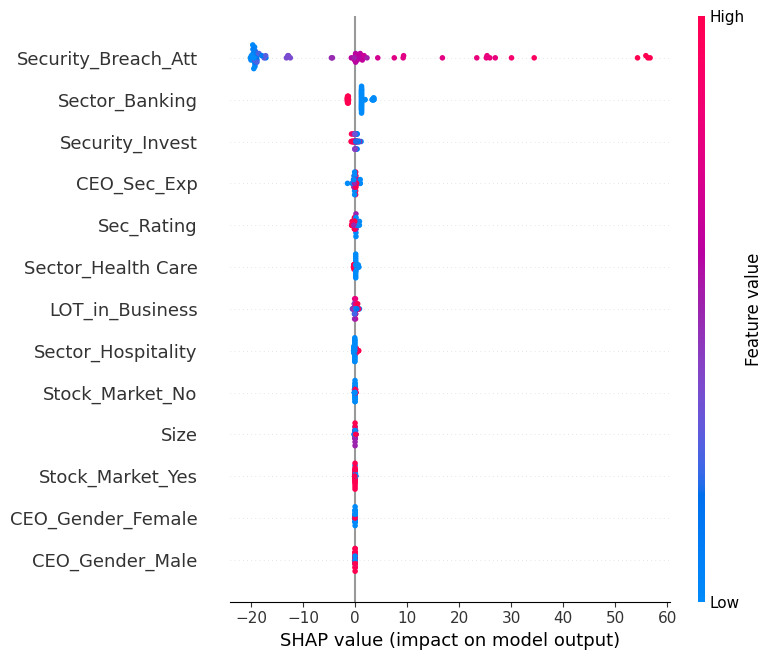

In [9]:
# Shap (SHapley Additive exPlanations)

import shap

best_regressor = best_model.named_steps['regressor']
fitted_preprocessor = best_model.named_steps['preprocessor']

X_transformed = fitted_preprocessor.transform(X)

ohe = fitted_preprocessor.named_transformers_['nominal']
ordinal = ordinal_variable
scale = numeric_variable

ohe_features = ohe.get_feature_names_out(nominal_variable)
feature_names = list(ohe_features) + ordinal + scale

X_df = pd.DataFrame(X_transformed, columns = feature_names)

explainer = shap.TreeExplainer(best_regressor)
shap_values = explainer.shap_values(X_df)
shap.summary_plot(shap_values, X_df)

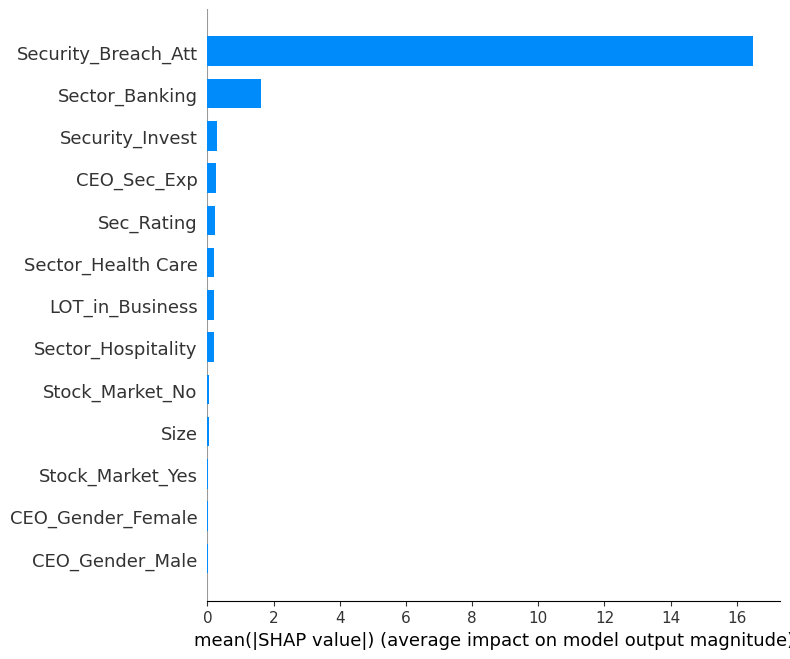

In [10]:
shap.summary_plot(shap_values, X_df, plot_type = 'bar')

### RandomForestClassifier

In [11]:
data = pd.read_csv('Data.csv', sep = ',')
X = data.drop(['Sec_Rating'], axis = 1)
y = data['Sec_Rating']

data.head()

,Sector,CEO_Gender,Size,Security_Invest,Security_Breach_Att,Succ_Sec_Breaches,Sec_Rating,CEO_Sec_Exp,LOT_in_Business,Stock_Market
0,Banking,Female,Small,17,11,2,Medium,High,13,No
1,Banking,Male,Small,18,12,4,High,Low,9,No
2,Banking,Male,Small,17,12,4,High,Medium,22,No
3,Banking,Male,Small,24,13,1,High,Medium,3,Yes
4,Banking,Male,Small,32,14,3,High,Medium,4,Yes


In [12]:
nominal_variable = ['Sector', 'Stock_Market', 'CEO_Gender']
ordinal_variable = ['Size', 'CEO_Sec_Exp']
numeric_variable = ['Security_Breach_Att', 'Succ_Sec_Breaches', 'Security_Invest', 'LOT_in_Business']

preprocessor = ColumnTransformer([
    ('nominal', preprocessing.OneHotEncoder(handle_unknown = 'ignore'), nominal_variable),
    ('ordinal', preprocessing.OrdinalEncoder(), ordinal_variable),
    ('scale', preprocessing.PowerTransformer(method = 'yeo-johnson'), numeric_variable)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ensemble.RandomForestClassifier(random_state = 42))
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print('Classification Report on Train Set:\n', metrics.classification_report(y_train, y_train_pred))
print('Classification Report on Test Set:\n', metrics.classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_test_pred))

Classification Report on Train Set:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       1.00      1.00      1.00        16
      Medium       1.00      1.00      1.00        17

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Classification Report on Test Set:
               precision    recall  f1-score   support

        High       0.60      0.50      0.55         6
         Low       0.00      0.00      0.00         1
      Medium       0.20      0.20      0.20         5

    accuracy                           0.33        12
   macro avg       0.27      0.23      0.25        12
weighted avg       0.38      0.33      0.36        12

Confusion Matrix:
 [[3 0 3]
 [0 0 1]
 [2 2 1]]


In [13]:
# Hyperparameters tuning

param_dist = {
    'classifier__n_estimators' : [100, 200, 300, 500],
    'classifier__max_depth' : [3, 5, 10, None],
    'classifier__min_samples_split' : [2, 4, 6],
    'classifier__min_samples_leaf' : [1, 2, 4],
    'classifier__max_features' : ['sqrt', 'log2', None]
}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

search = model_selection.RandomizedSearchCV(estimator = pipeline,
                           param_distributions = param_dist,
                           n_iter = 25,
                           cv = 5,
                           scoring = 'f1_weighted',
                           n_jobs = -1,
                           verbose = 1)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print('Best Parameters: ', search.best_params_)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print('\nClassification Report on Train Set: \n', metrics.classification_report(y_train, y_train_pred))
print('\nClassification Report on Test Set: \n', metrics.classification_report(y_test, y_test_pred))

cv = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = model_selection.cross_val_score(best_model, X, y, cv = cv, scoring = 'f1_weighted')

print(f'\nStratified 5-fold cross-validation F1 weighted: Mean = {cv_scores.mean():.3f}, Std = {cv_scores.std():.3f}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters:  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 4, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None}

Classification Report on Train Set: 
               precision    recall  f1-score   support

        High       1.00      0.94      0.97        17
         Low       1.00      1.00      1.00        14
      Medium       0.94      1.00      0.97        17

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48


Classification Report on Test Set: 
               precision    recall  f1-score   support

        High       0.25      0.25      0.25         4
         Low       0.50      0.33      0.40         3
      Medium       0.50      0.60      0.55         5

    accuracy                           0.42        12
   macro avg      

In [14]:
# Since the Classifier is still overfitting on the Train Set, it is worth to try the following

nominal_variable = ['Sector', 'Stock_Market', 'CEO_Gender']
ordinal_variable = ['Size', 'CEO_Sec_Exp']
numeric_variable = ['Security_Breach_Att', 'Succ_Sec_Breaches', 'Security_Invest', 'LOT_in_Business']

preprocessor = ColumnTransformer([
    ('nominal', preprocessing.OneHotEncoder(handle_unknown = 'ignore'), nominal_variable),
    ('ordinal', preprocessing.OrdinalEncoder(), ordinal_variable),
    ('scale', preprocessing.PowerTransformer(method = 'yeo-johnson'), numeric_variable)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ensemble.RandomForestClassifier(n_estimators = 100,
                                                   max_depth = 5,
                                                   min_samples_leaf = 3,
                                                   max_features = 'sqrt',
                                                   class_weight = 'balanced', random_state = 42))
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print('Classification Report on Train Set:\n', metrics.classification_report(y_train, y_train_pred))
print('Classification Report on Test Set:\n', metrics.classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_test_pred))

Classification Report on Train Set:
               precision    recall  f1-score   support

        High       0.88      0.82      0.85        17
         Low       0.80      0.86      0.83        14
      Medium       0.94      0.94      0.94        17

    accuracy                           0.88        48
   macro avg       0.87      0.87      0.87        48
weighted avg       0.88      0.88      0.88        48

Classification Report on Test Set:
               precision    recall  f1-score   support

        High       0.50      0.25      0.33         4
         Low       0.67      0.67      0.67         3
      Medium       0.57      0.80      0.67         5

    accuracy                           0.58        12
   macro avg       0.58      0.57      0.56        12
weighted avg       0.57      0.58      0.56        12

Confusion Matrix:
 [[1 0 3]
 [1 2 0]
 [0 1 4]]


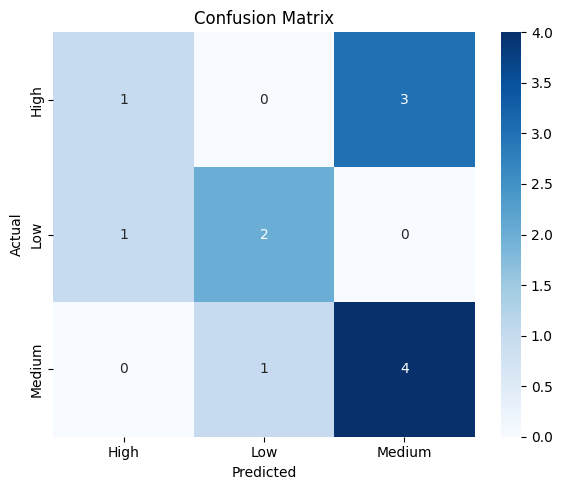

In [17]:
# Confusion Matrix visualization

cm = metrics.confusion_matrix(y_test, y_test_pred, labels = pipeline.classes_)

plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
           xticklabels = pipeline.classes_,
           yticklabels = pipeline.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show();

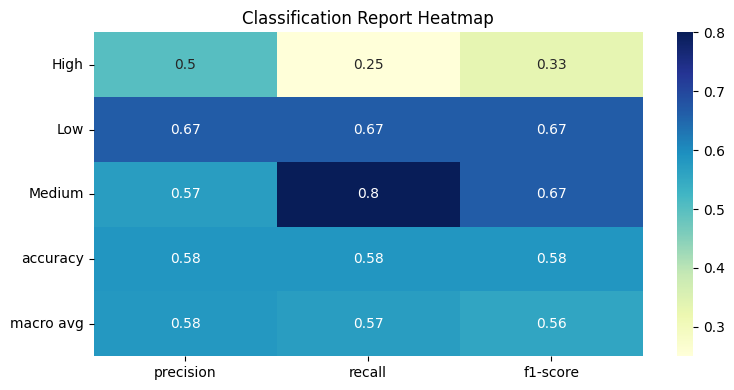

In [18]:
# Classification Report Heatmap (precision, recall, f1-score by class)

report = metrics.classification_report(y_test, y_test_pred, output_dict = True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize = (8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot = True, cmap = 'YlGnBu')
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show();

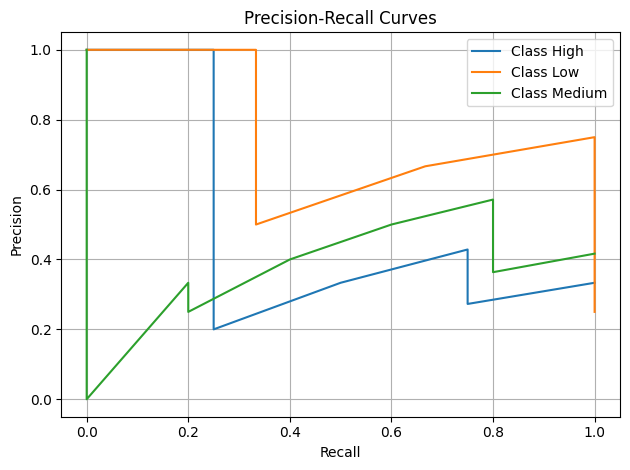

In [19]:
# Precision-Recall Curve

# Binarize lables for multi-class PR curves

y_test_bin = preprocessing.label_binarize(y_test, classes = pipeline.classes_)
y_score = pipeline.predict_proba(X_test)

for i, class_label in enumerate(pipeline.classes_):
    precision, recall, _ = metrics.precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label = f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

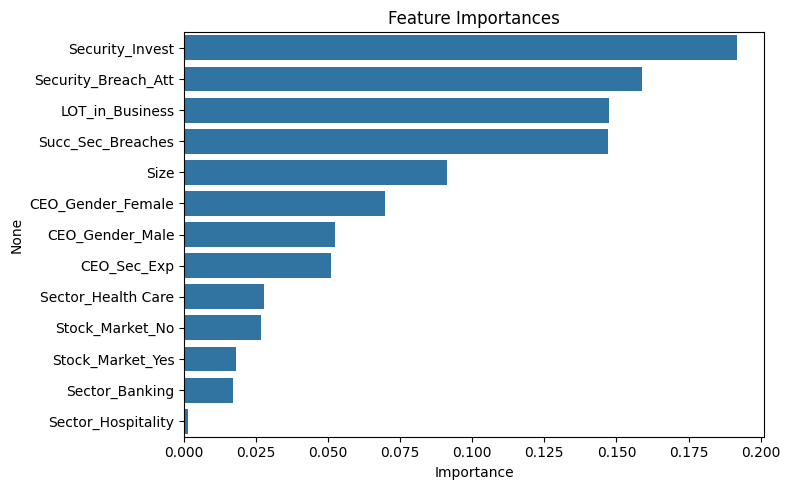

In [20]:
# Feature Importances Bar Chart

ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(nominal_variable)
ordinal_features = ordinal_variable
numeric_features = numeric_variable

feature_names = np.concatenate([ohe_feature_names, ordinal_features, numeric_features])
importances = pipeline.named_steps['classifier'].feature_importances_

feat_imp = pd.Series(importances, index = feature_names).sort_values(ascending = False)

plt.figure(figsize = (8, 5))
sns.barplot(x = feat_imp.values, y = feat_imp.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show();

### Conclusion:

The model overfits to the training data. Generalization on the rest set is weak, especially for the 'High' class. Class imbalance might contribute to instability, especially for minority classes - only 4 samples for 'High'. 'High' class needs better representation or model sensitivity. Suggesion: switching to another model like XGBoost Classifier

## XGBoost Regressor

In [21]:
data = pd.read_csv('Data.csv', sep = ',')
data.head()

,Sector,CEO_Gender,Size,Security_Invest,Security_Breach_Att,Succ_Sec_Breaches,Sec_Rating,CEO_Sec_Exp,LOT_in_Business,Stock_Market
0,Banking,Female,Small,17,11,2,Medium,High,13,No
1,Banking,Male,Small,18,12,4,High,Low,9,No
2,Banking,Male,Small,17,12,4,High,Medium,22,No
3,Banking,Male,Small,24,13,1,High,Medium,3,Yes
4,Banking,Male,Small,32,14,3,High,Medium,4,Yes


In [22]:
X = data.drop(['Succ_Sec_Breaches'], axis = 1)
y = data['Succ_Sec_Breaches']

In [23]:
# Define feature types

nominal_variable = ['Sector', 'Stock_Market', 'CEO_Gender']
ordinal_variable = ['Size', 'Sec_Rating', 'CEO_Sec_Exp']
numeric_variable = ['Security_Breach_Att', 'Security_Invest', 'LOT_in_Business']

# ColumnTransformer

preprocessor = ColumnTransformer([
    ('nominal', preprocessing.OneHotEncoder(handle_unknown = 'ignore'), nominal_variable),
    ('ordinal', preprocessing.OrdinalEncoder(), ordinal_variable),
    ('scale', preprocessing.PowerTransformer(method = 'yeo-johnson'), numeric_variable)
])

In [24]:
# Initial Model Run

from xgboost import XGBRegressor, callback

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 1.000
Train MAE: 0.001
Train RMSE: 0.001


Test R^2: 0.817
Test MAE: 4.924
Test RMSE: 7.854


### Conclusion:

The initial model memorized the training data perfectly, but is struggles to generalize to unseen data. Most likely because:
- data is small
- default hyperparameters
- no regularization yet applied.


In [25]:
# Custom TargetEncoder class

class SimpleTargetEncoder:
    def __init__(self):
        self.target_means = {}
        self.global_mean = None
        self.columns = []

    def fit(self, X, y, columns):
        self.columns = columns
        self.global_mean = y.mean()
        self.target_means = {}

        for col in columns:
            self.target_means[col] = (X[[col]].join(y).groupby(col)[y.name].mean().to_dict())
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for col in self.columns:
            X_encoded[col] = X_encoded[col].map(self.target_means[col]).fillna(self.global_mean)
        return X_encoded

    def fit_transform(self, X, y, columns):
        self.fit(X, y, columns)
        return self.transform(X)

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, stratify = None, random_state = 42)

# Encode nominal variable

te = SimpleTargetEncoder()
X_train_nominal = te.fit_transform(X_train[nominal_variable], y_train, nominal_variable)
X_test_nominal = te.transform(X_test[nominal_variable])

# Encode ordinal variable

oe = preprocessing.OrdinalEncoder()
X_train_ordinal = oe.fit_transform(X_train[ordinal_variable])
X_test_ordinal = oe.transform(X_test[ordinal_variable])

# Scale numeric variable

pt = preprocessing.PowerTransformer(method = 'yeo-johnson')
X_train_scaled = pt.fit_transform(X_train[numeric_variable])
X_test_scaled = pt.transform(X_test[numeric_variable])

# Concatenate all parts

X_train_final = np.concatenate([X_train_nominal, X_train_ordinal, X_train_scaled], axis = 1)
X_test_final = np.concatenate([X_test_nominal, X_test_ordinal, X_test_scaled], axis = 1)

In [27]:
# Hyperparameters tuning and the best model run

param_dist = {
    'n_estimators' : [100, 200, 300, 500],
    'max_depth' : [3, 4, 5, 6, 8],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'subsample' : [0.6, 0.8, 1.0],
    'colsample_bytree' : [0.6, 0.8, 1.0],
    'reg_alpha' : [0, 0.1, 0.5, 1.0],
    'reg_lambda' : [0.5, 1.0, 1.5, 2.0]
}

random_search = model_selection.RandomizedSearchCV(estimator = XGBRegressor(objective = 'reg:squarederror', random_state = 42),
                                                  param_distributions = param_dist,
                                                  n_iter = 25, scoring = 'neg_root_mean_squared_error',
                                                  cv = 5, verbose = 1, random_state = 42, n_jobs = -1)

random_search.fit(X_train_final, y_train)

best_model = random_search.best_estimator_
print('Best Parameters:\n', random_search.best_params_)

y_train_pred = best_model.predict(X_train_final)
y_test_pred = best_model.predict(X_test_final)

print('\n')
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters:
 {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


Train R^2: 0.999
Train MAE: 0.330
Train RMSE: 0.550


Test R^2: 0.831
Test MAE: 5.455
Test RMSE: 7.562


### Conclusion:

Even after hyperparameters tuning, the model has memorized training patters too closely and is struggling to generalize. Therefore it is worth to:

1. use cross-validation as final estimator check to ensure that the model is stable across different subsets on the entire dataset.
2. applying log transformation on the target feature

In [28]:
# Cross-Validation

kf = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 42)

X_final = np.concatenate([X_train_final, X_test_final])
y_final = pd.concat([y_train, y_test], axis = 0).reset_index(drop = True)

cv_scores = model_selection.cross_val_score(best_model, X_final, y_final,
                                           cv = kf, scoring = 'neg_root_mean_squared_error')

print(f'\nCross-Validation RMSE (5-Fold):')
print(f'Mean = {-cv_scores.mean():.3f}, Std = {cv_scores.std():.3f}')


Cross-Validation RMSE (5-Fold):
Mean = 8.038, Std = 1.836


In [29]:
# Log transformation on target feature and early stopping

#from xgboost.callback import EarlyStopping

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

xgb = XGBRegressor(objective = 'reg:squarederror',
                  random_state = 42,
                  subsample = 1.0,
                  reg_lambda = 0.5,
                  reg_alpha = 0.1,
                  n_estimators = 100,
                  max_depth = 6,
                  learning_rate = 0.05,
                  colsample_bytree = 0.8)

xgb.fit(X_train_final, y_train_log)

y_train_log_pred = xgb.predict(X_train_final)
y_train_pred = np.expm1(y_train_log_pred)

y_test_log_pred = xgb.predict(X_test_final)
y_test_pred = np.expm1(y_test_log_pred)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.989
Train MAE: 1.060
Train RMSE: 2.475


Test R^2: 0.808
Test MAE: 5.959
Test RMSE: 8.046


In [30]:
# Cross-Validation on Log-Transformed Target

"'This checks if XGBoost Regressor is consistently generalizing well, even when trained on different subsets of the data'"

xgb_cv = XGBRegressor(
    objective = 'reg:squarederror',
    random_state = 42,
    subsample = 1.0,
    reg_lambda = 0.5,
    reg_alpha = 0.1,
    n_estimators = 100,
    max_depth = 6,
    learning_rate = 0.05,
    colsample_bytree = 0.8
)

y_log = np.log1p(y)

kf = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = model_selection.cross_val_score(
    xgb_cv,
    np.concatenate([X_train_final, X_test_final]),
    y_log,
    scoring = 'neg_root_mean_squared_error',
    cv = kf
)

print(f'Cross-Validated RMSE (on log-transformed target):')
print(f'Mean: {-cv_scores.mean():.3f}, Std: {cv_scores.std():.3f}')

Cross-Validated RMSE (on log-transformed target):
Mean: 1.294, Std: 0.190


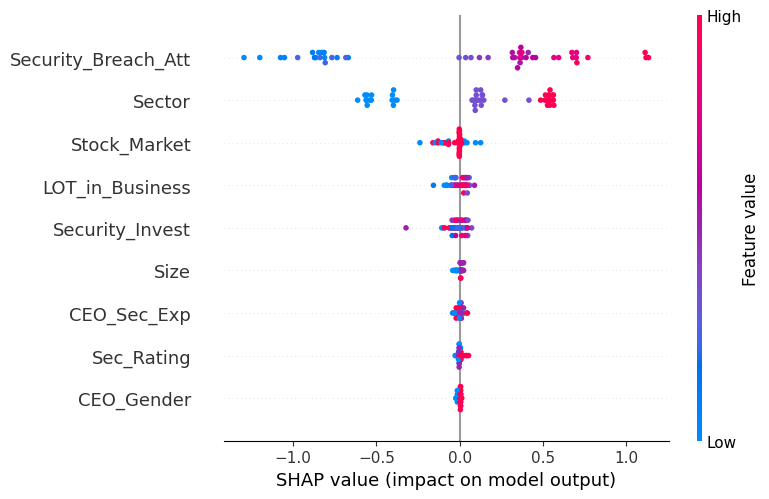

In [31]:
# SHAP

explainer = shap.Explainer(xgb)

shap_values = explainer(X_train_final)

shap.summary_plot(shap_values, feature_names = [
    *X_train[nominal_variable].columns,
    *ordinal_variable,
    *numeric_variable])

### Conclusion:

High R^2 on training and test sets indicates the model explains most of the variancein both datasets. Low MAE/RMSE on training vs higher MAE/RMSE on testing suggests mild overfitting, but it is within acceptable range. Cross-validated RMSE (on log-transformed target) is low and consistent, which supports the model's robustness.

From the SHAP plot:
1. **Top Influential Feature:**

    - Number of Security Breach Attemps: Higher number of attempted breaches increases the prediction of successful breaches.
      
2. **Moderately Influential Features**

    - Business Sector and Stock Market Business: Business domain and market type impact the breach success likelihood.
    - Length of Time in Business and Investments: Older firms and those investing more in security show varying breach success rates.

3. **Less influential:**

   - CEO Gender, Security Rating, CEO Security Experience and Business Size: Have minor contributions in model predicton, though some interaction exists.
  
Model trained on log-transformed target performs strongly, generalizes well, and is well-calibrated. Cross-validation on the log-transformed target confirmed the model's stability and low variance. The SHAP plot validates that the model is interpretable and sensitive to domain-relevant features like Number of Security Breach Attempts and Investments. 

## XGBoost Classifier

In [41]:
from xgboost import XGBClassifier

In [42]:
data = pd.read_csv('Data.csv', sep = ',')
data.head()

,Sector,CEO_Gender,Size,Security_Invest,Security_Breach_Att,Succ_Sec_Breaches,Sec_Rating,CEO_Sec_Exp,LOT_in_Business,Stock_Market
0,Banking,Female,Small,17,11,2,Medium,High,13,No
1,Banking,Male,Small,18,12,4,High,Low,9,No
2,Banking,Male,Small,17,12,4,High,Medium,22,No
3,Banking,Male,Small,24,13,1,High,Medium,3,Yes
4,Banking,Male,Small,32,14,3,High,Medium,4,Yes


In [43]:
# Features and Target

X = data.drop(['Sec_Rating'], axis = 1)
y = data['Sec_Rating'].map({'Low':0, 'Medium':1, 'High':2})

# Define feature types

nominal_features = ['Sector', 'Stock_Market', 'CEO_Gender']
ordinal_features = ['Size', 'CEO_Sec_Exp']
numeric_features = ['Security_Breach_Att', 'Succ_Sec_Breaches', 'Security_Invest', 'LOT_in_Business']

# Preprocessing

preprocessor = ColumnTransformer([
    ('nominal', preprocessing.OneHotEncoder(handle_unknown = 'ignore'), nominal_features),
    ('ordinal', preprocessing.OrdinalEncoder(), ordinal_features),
    ('scale', preprocessing.PowerTransformer(method = 'yeo-johnson'), numeric_features)
])

In [44]:
# Initial Model 

xgb_clf = XGBClassifier(objective = 'multi:softprob', eval_metric = 'mlogloss', verbosity = 0, random_state = 42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, stratify = y,
                                                                   random_state = 42)

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print('Classification Report on Train Set:\n', metrics.classification_report(y_train, y_train_pred))
print('Classification Report on Test Set:\n', metrics.classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_test_pred))

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.50      0.40      0.44         5
           2       0.60      0.75      0.67         4

    accuracy                           0.50        12
   macro avg       0.48      0.49      0.48        12
weighted avg       0.49      0.50      0.49        12

Confusion Matrix:
 [[1 2 0]
 [1 2 2]
 [1 0 3]]


### Conclusion:

Model overfitting - memorizing training data instead of generalizing. Confusion matrix shows a lot of misclassification, expecially between classes 0 and 1, and 1 and 2. Recommendations to Improve the performance:
1. Hyperparameter Tuning
2. Cross-Validation
3. SMOTE

In [45]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [47]:
# Hyperparameters tuning, SMOTE and the model run

pipeline = ImbPipeline(steps = [
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state = 42)),
    ('classifier', xgb_clf)
])

param_grid = {
    'classifier__n_estimators' : [50, 100, 150],
    'classifier__max_depth' : [2, 3, 4, 5],
    'classifier__learning_rate' : [0.01, 0.1, 0.3],
    'classifier__subsample' : [0.6, 0.8, 1.0],
    'classifier__colsample_bytree' : [0.6, 0.8, 1.0],
    'classifier__reg_alpha' : [0, 0.1, 1],
    'classifier__reg_lambda' : [0.1, 1, 10]
}

cv = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

search = model_selection.RandomizedSearchCV(
    estimator = pipeline,
    param_distributions = param_grid,
    scoring = 'f1_macro',
    n_iter = 25,
    cv = cv,
    verbose = 1,
    n_jobs = -1,
    random_state = 42,
    return_train_score = True
)

search.fit(X_train, y_train)

best_model = search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print('\nHyperparameters:', search.best_params_)
print('\nTrain Classification Report:\n', metrics.classification_report(y_train, y_train_pred))
print('\nTest Classification Report:\n', metrics.classification_report(y_test, y_test_pred))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, y_test_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Hyperparameters: {'classifier__subsample': 1.0, 'classifier__reg_lambda': 1, 'classifier__reg_alpha': 1, 'classifier__n_estimators': 100, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.3, 'classifier__colsample_bytree': 0.6}

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48


Test Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.60      0.60      0.60         5
           2       1.00      0.50      0.67         4

    accuracy                           0

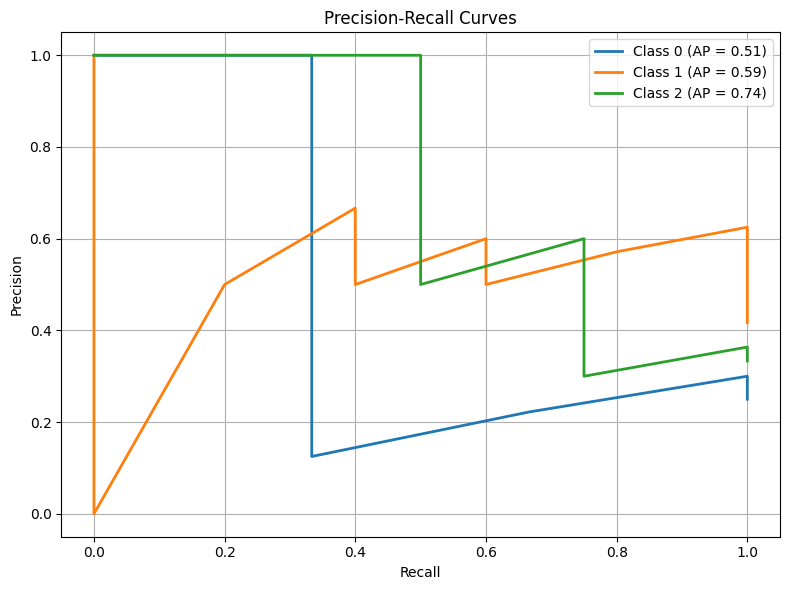

In [48]:
# Precision - Recall Curves

classes = [0, 1, 2]      # target classes

# Binarize the test labels for precision-recall curve

y_test_bin = preprocessing.label_binarize(y_test, classes = classes)
y_score = best_model.predict_proba(X_test)

fig, ax = plt.subplots(figsize = (8, 6))
for i, class_label in enumerate(classes):
    precision, recall, _ = metrics.precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap_score = metrics.average_precision_score(y_test_bin[:, i], y_score[:, i])
    ax.plot(recall, precision, lw = 2, label = f'Class {class_label} (AP = {ap_score:.2f})')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves')
ax.legend(loc = 'best')
plt.grid(True)
plt.tight_layout()
plt.show();

In [51]:
# Cross - validated performance (macro F1)

cv_scores = model_selection.cross_val_score(best_model, X, y, cv = cv, scoring = 'f1_macro')

print(f'Stratified 5-fold cross-validation F1 Macro: Mean = {cv_scores.mean():.3f}, Std = {cv_scores.std():.3f}')

Stratified 5-fold cross-validation F1 Macro: Mean = 0.395, Std = 0.093


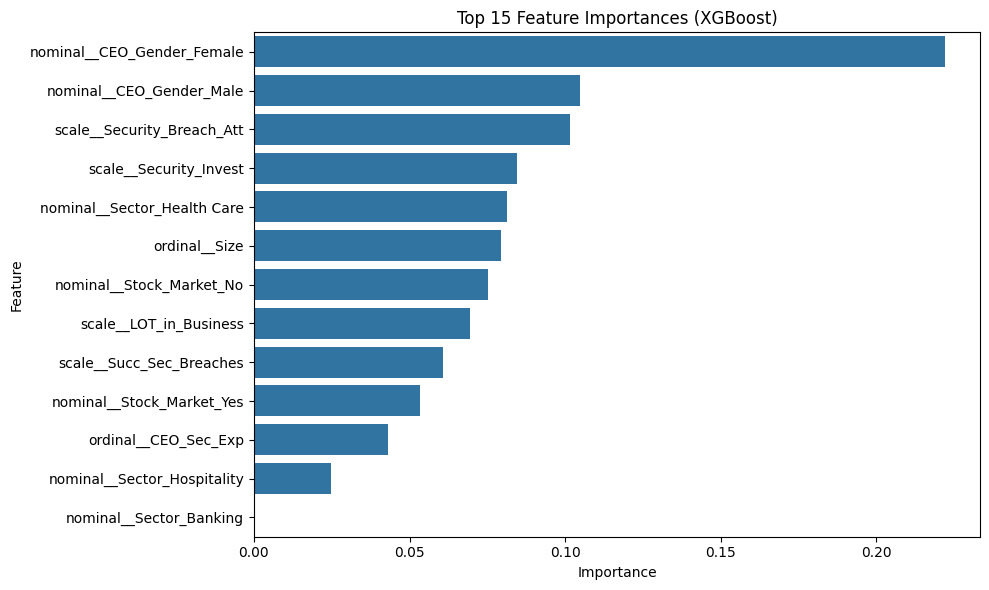

In [52]:
# Feature Importances from best XGBoost model

encoded_feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
importances = best_model.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature' : encoded_feature_names,
    'Importance' : importances
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df.head(15))
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show();

### Conclusion

Extremely high performance on training data suggests overfitting - model has likely memorized the training data. Model is more confident and precise with Class 2 (High), and struggles most with Class 0 (Low). Cross-validated performance confirms low generalization and performance varies across folds, hinting instability due to small dataset size. Poor generalization is confirmed by cross-validated F1 = 0.395 and unstable predictions especially on class 0 ('Low').